# Predicting Enron Spam Emails using Supervised Learning

## DS-GA 1001: Introduction to Data Science Final Project

### Scripts

## Exploratory Data Analysis

Created On: 11/25/2020

Modified On: 11/30/2020

### Description

This script applies exploratory data analysis (EDA) to the `emails_cleaned.csv` dataset. 

In [65]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

### Analyze Text Statistics

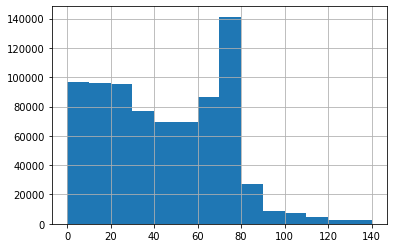

In [109]:
# Plot the average word length in each email instance
df = pd.read_csv('../data/emails.csv')
df['X'].str.len().hist(bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140])

In [66]:
df = pd.read_csv('../data/emails_cleaned.csv')

In [67]:
df.shape

(829210, 2)

### Missing Values

In [68]:
print('\nTotal missing values (NaN) in each column: \n\n', df.isnull().sum())


Total missing values (NaN) in each column: 

 X    43538
y        0
dtype: int64


In [69]:
print('Total missing values (NaN) takes up ', str(41998/829210),' of our data')

Total missing values (NaN) takes up  0.05064820732986819  of our data


In [70]:
# Drop rows containing missing values
df = df.dropna(axis=0, how='any')

### Dimensions

The cleaned email dataset has 2 columns and 787,212 data records.

In [71]:
df.shape

(785672, 2)

In [91]:
df.head()

,X,y
1,hot springs ark tradestar otc tirr today annou...,1
2,peopie know website boost revenues way,1
3,ms exchange enterprise server,1
4,downtime request,0
5,beverly,0


### Plot Frequencies

In [74]:
import itertools
import collections
token = [word.lower().split() for word in df['X']]

token_extract=list(itertools.chain(*token))
token_count=collections.Counter(token_extract)

In [75]:
clean_token = pd.DataFrame(token_count.most_common(15),
                             columns=['words', 'count'])
clean_token

,words,count
0,com,23970
1,company,22911
2,please,19974
3,would,15394
4,new,15140
5,may,13050
6,information,12985
7,time,12267
8,business,12108
9,said,11866


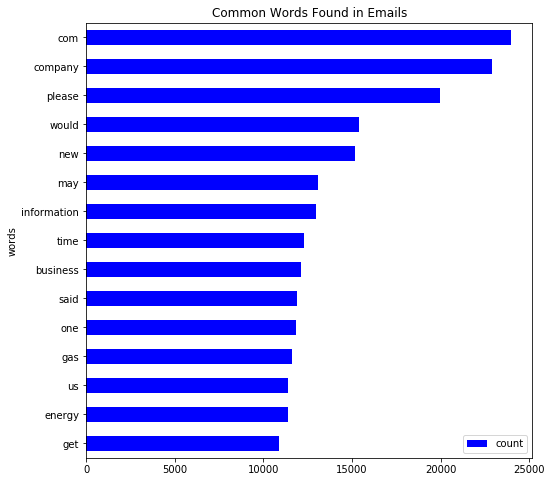

In [76]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_token.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words Found in Emails")

plt.show()

In [111]:
clean_token

,words,count
0,com,23970
1,company,22911
2,please,19974
3,would,15394
4,new,15140
5,may,13050
6,information,12985
7,time,12267
8,business,12108
9,said,11866


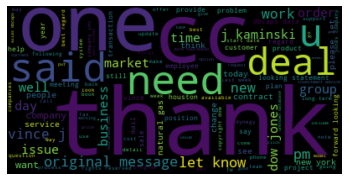

In [86]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#convert list to string
str_token = ' '.join(map(str, token_extract)) 

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str_token)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

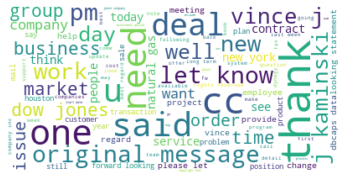

In [88]:
wordcloud2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str_token)
plt.figure()
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

In [90]:
wordcloud.to_file("wordcloud1.png")
wordcloud2.to_file("wordcloud2.png")

In [83]:
#check the path to python
import sys
print(sys.executable)

/Users/jiejie/opt/anaconda3/bin/python


In [ ]:
#input the following code in jupyter notebook terminal to install wordcloud
#/Users/jiejie/opt/anaconda3/bin/python -m pip install wordcloud

#input the following code in jupyter notebook terminal to install statsmodels
#/Users/jiejie/opt/anaconda3/bin/python -m pip install -U statsmodels

### Head and Tail

Below are the first and last 5 rows of record.

In [11]:
display(df.head())
display(df.tail())

,X,y
0,provided investext reports updated continuously,0
1,adobe audition,1
3,cc heather choate hou ect ect irena hogan hou ...,0
4,suspending others also resumed limited trading,0
5,ferc rejection southern company setrans,0


,X,y
829205,prices u dollars ex works,1
829206,solution penis growth,1
829207,day settle positions said kilduff whose compan...,0
829208,thanks,0
829209,cc hasan kedwaii et enron enron,0


### Spam Ratio

In our dataset, 379,336 records are marked as **spam** (48.19\%) . 407,876 are not spam (51.81\%).

In [12]:
display(df['y'].value_counts())
display((df['y'].value_counts() / len(df['y'])) * 100)

0    407876
1    379336
Name: y, dtype: int64

0    51.812726
1    48.187274
Name: y, dtype: float64

### Vectorization

Next, collect each word and its frequency in each email.

In [13]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['X'])

In [14]:
display(X.shape)

(787212, 143176)

Within the 787,212 email records, there are 143,176 unique words (features) in the dataset.

In [15]:
# print the first 10 features
display(vectorizer.get_feature_names()[:10])

['aa',
 'aaa',
 'aaaa',
 'aaaacy',
 'aaaahhhhhh',
 'aaadrizzle',
 'aaaenerfax',
 'aaagrp',
 'aaal',
 'aaaplusdirect']

In [25]:
vectorizer.vocabulary_

{'provided': 99436,
 'investext': 62866,
 'reports': 105411,
 'updated': 130290,
 'continuously': 25560,
 'adobe': 1783,
 'audition': 8507,
 'cc': 19185,
 'heather': 54862,
 'choate': 21001,
 'hou': 57277,
 'ect': 36993,
 'irena': 63308,
 'hogan': 56597,
 'chantelle': 20202,
 'suspending': 120547,
 'others': 90190,
 'also': 4033,
 'resumed': 106080,
 'limited': 72384,
 'trading': 126151,
 'ferc': 44322,
 'rejection': 104718,
 'southern': 116475,
 'company': 23901,
 'setrans': 112514,
 'way': 135299,
 'class': 22036,
 'make': 75695,
 'sure': 120385,
 'miss': 80079,
 'anyone': 5862,
 'pam': 91571,
 'government': 51754,
 'wants': 134969,
 'give': 50694,
 'away': 9237,
 'money': 80985,
 'congressional': 24898,
 'middle': 79302,
 'office': 87947,
 'functional': 48157,
 'groups': 52550,
 'introduced': 62726,
 'dual': 35670,
 'reporting': 105408,
 'error': 40747,
 'dbcaps': 29528,
 'data': 29290,
 'perform': 93409,
 'operation': 89220,
 'closed': 22447,
 'database': 29292,
 'subject': 119449,